In [1]:
import os
import requests
import csv
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#first file
filename = "22-08rm" #man"s results
csv_ =  f"{filename}.csv"
# Path
data_folder = "data"
#Creating an output file in writing mode
csv_file = os.path.join(data_folder,csv_)

#read csv to data frame
df1 = pd.read_csv(csv_file, sep="|"  , engine="python")

In [3]:
#next filename, may note be needed
filename = "22-08rw" #woman"s results
csv_ =  f"{filename}.csv"
# Path
data_folder = "data"
#Creating an output file in writing mode
csv_file = os.path.join(data_folder,csv_)

#read csv to data frame
df2 = pd.read_csv(csv_file, sep="|"  , engine="python")


In [12]:
#combine the two dataframes from above
df = pd.concat([df1,df2])
df.size

# df = df1.append(df2,ignore_index=True)
# df.size

86717

In [13]:
df.head()

,meet,event,gender,age_group,distance,scy_lcy,stroke,rank,name,age,team,seed,finals,seed_time,finals_time,delta,gain_drop_same
0,2021 PV RMSC October Kick-Off Classic - 10/15/...,Boys 9-10 50 Yard Freestyle,Boys,9-10,50,Yard,Freestyle,1,"Fontana, Rafael",10,RMSC,29.89,28.01,29.89,28.02,-1.87500,Drop
1,2021 PV RMSC October Kick-Off Classic - 10/15/...,Boys 9-10 50 Yard Freestyle,Boys,9-10,50,Yard,Freestyle,2,"Gravell, John",10,RMSC,29.22,29.12,29.22,29.12,-0.09375,Drop
2,2021 PV RMSC October Kick-Off Classic - 10/15/...,Boys 9-10 50 Yard Freestyle,Boys,9-10,50,Yard,Freestyle,3,"Stringer, JJ",10,RMSC,34.41,29.43,34.40,29.44,-4.97000,Drop
3,2021 PV RMSC October Kick-Off Classic - 10/15/...,Boys 9-10 50 Yard Freestyle,Boys,9-10,50,Yard,Freestyle,4,"Ohtani, Haruki",10,Unattached,30.91,30.64,30.90,30.64,-0.26560,Drop
4,2021 PV RMSC October Kick-Off Classic - 10/15/...,Boys 9-10 50 Yard Freestyle,Boys,9-10,50,Yard,Freestyle,5,"Silva, Deshan",10,TOLL,33.08,30.98,33.10,30.98,-2.11000,Drop


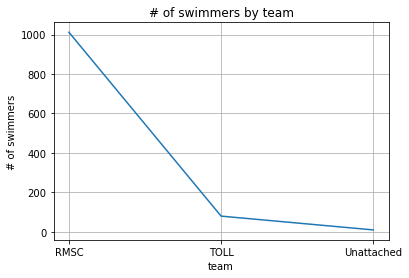

In [6]:
#swimmers by club
df_club = df.groupby(["team"]).agg({"name": [pd.Series.nunique]}) #count unique swimmer names
df_club.columns = ["count"]
df_club = df_club.reset_index()
df_club.head(10)


x = df_club["team"]
y = df_club["count"]

plt.title("# of swimmers by team")
plt.xlabel("team")
plt.ylabel("# of swimmers")

plt.plot(x,y)
plt.grid(True)
plt.style.use("fivethirtyeight")

plt.show()

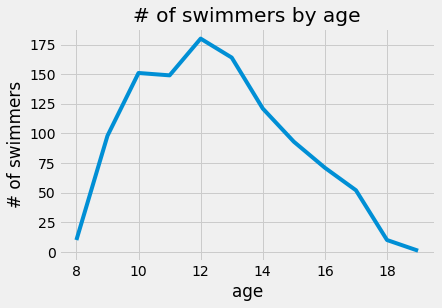

In [7]:
#swimmers by club
df_age = df.groupby(["age"]).agg({"name": [pd.Series.nunique]}) #count unique swimmer names
df_age.columns = ["count"]
df_age = df_age.reset_index()
df_age.head(10)


x = df_age["age"]
y = df_age["count"]

plt.title("# of swimmers by age")
plt.xlabel("age")
plt.ylabel("# of swimmers")

plt.plot(x,y)
plt.grid(True)
plt.style.use("fivethirtyeight")

plt.show()

In [8]:
#filtering nt (seed = 10000.00) and dq (time = 00.00) out of the data frame
filt = ((df["seed"] != "10000.00") | (df["finals"] != "00.00"))

#df with no dq and no NT
df_noDQ_noNT = df[filt]


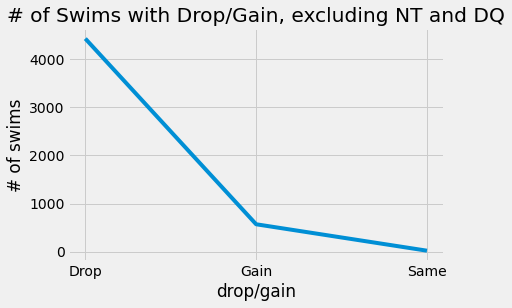

In [9]:
#swimmers by club
df_drop_gain = df_noDQ_noNT.groupby(["gain_drop_same"]).agg({"gain_drop_same": ["count"]}) #count swimmer names
df_drop_gain.columns = ["gain_drop_same_count"]
df_drop_gain = df_drop_gain.reset_index()

x = df_drop_gain["gain_drop_same"]
y = df_drop_gain["gain_drop_same_count"]

plt.title("# of Swims with Drop/Gain, excluding NT and DQ")
plt.xlabel("drop/gain")
plt.ylabel("# of swims")

plt.plot(x,y)
plt.grid(True)
plt.style.use("fivethirtyeight")

plt.show()



In [10]:
#counting drop/gain by gender and age
df_drop_gain_gender_age = df_noDQ_noNT.groupby(["gender", "age", "gain_drop_same"]).agg({"gain_drop_same": ["count"]})
df_drop_gain_gender_age.columns = ["gain_drop_count"]
df_drop_gain_gender_age = df_drop_gain_gender_age.reset_index()
df_drop_gain_gender_age.head(5)

,gender,age,gain_drop_same,gain_drop_count
0,Boys,8,Drop,17
1,Boys,8,Gain,2
2,Boys,9,Drop,164
3,Boys,9,Gain,7
4,Boys,10,Drop,335


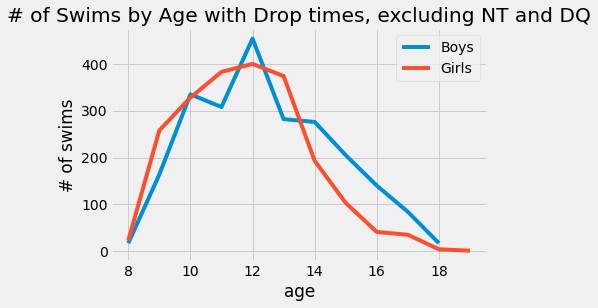

In [11]:
#create data frame for drop in both man/woman
filt = ((df_drop_gain_gender_age["gender"] == "Boys") & (df_drop_gain_gender_age["gain_drop_same"] == "Drop"))
df_drop_man= df_drop_gain_gender_age[filt]

filt = ((df_drop_gain_gender_age["gender"] == "Girls") & (df_drop_gain_gender_age["gain_drop_same"] == "Drop"))
df_drop_woman= df_drop_gain_gender_age[filt]

#Drop man/woman
x1 = df_drop_man["age"] 
y1 = df_drop_man["gain_drop_count"]

x2 = df_drop_woman["age"] 
y2 = df_drop_woman["gain_drop_count"]


plt.plot(x1,y1, label = "Boys")
plt.plot(x2,y2, label = "Girls")

plt.title("# of Swims by Age with Drop times, excluding NT and DQ")
plt.xlabel("age")
plt.ylabel("# of swims")

plt.grid(True)
plt.style.use("fivethirtyeight")
plt.legend(loc="upper right")

plt.show()


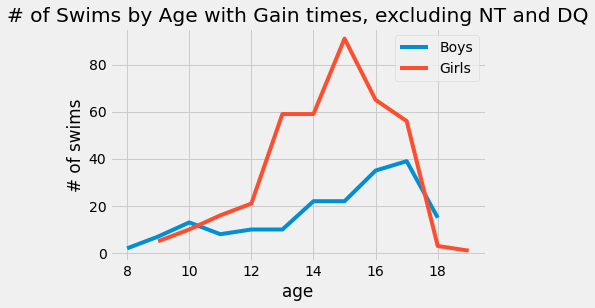

In [12]:
#create data frame for gain in both man/woman
filt = ((df_drop_gain_gender_age["gender"] == "Boys") & (df_drop_gain_gender_age["gain_drop_same"] == "Gain"))
df_gain_man= df_drop_gain_gender_age[filt]

filt = ((df_drop_gain_gender_age["gender"] == "Girls") & (df_drop_gain_gender_age["gain_drop_same"] == "Gain"))
df_gain_woman= df_drop_gain_gender_age[filt]

#Drop man/woman
x1 = df_gain_man["age"] 
y1 = df_gain_man["gain_drop_count"]

x2 = df_gain_woman["age"] 
y2 = df_gain_woman["gain_drop_count"]


plt.plot(x1,y1, label = "Boys")
plt.plot(x2,y2, label = "Girls")

plt.title("# of Swims by Age with Gain times, excluding NT and DQ")
plt.xlabel("age")
plt.ylabel("# of swims")

plt.grid(True)
plt.style.use("fivethirtyeight")
plt.legend(loc="upper right")

plt.show()


In [41]:
#counting drop/gain by stroke
df_drop_gain_stroke = df_noDQ_noNT.groupby(["stroke", "gender", "gain_drop_same"]).agg({"gain_drop_same": ["count"]})
df_drop_gain_stroke.columns = ["gain_drop_count"]
df_drop_gain_stroke = df_drop_gain_stroke.reset_index()
df_drop_gain_stroke.head(5)


,stroke,gender,gain_drop_same,gain_drop_count
0,Backstroke,Boys,Drop,391
1,Backstroke,Boys,Gain,35
2,Backstroke,Boys,Same,4
3,Backstroke,Girls,Drop,388
4,Backstroke,Girls,Gain,83


In [43]:
#count by strokes
df_count_stroke = df_noDQ_noNT.groupby(["stroke"]).agg({"stroke": ["count"]})
df_count_stroke.columns = ["stroke_count"]
df_count_stroke = df_count_stroke.reset_index()
df_count_stroke.head(5)

df_count_stroke.head()

,stroke,stroke_count
0,Backstroke,904
1,Breaststroke,923
2,Butterfly,620
3,Freestyle,1856
4,IM,711


In [44]:
#join stroke counts and stroke gain/drop
df_drop_gain_stroke_join = df_drop_gain_stroke.merge(df_count_stroke, on="stroke")

df_drop_gain_stroke_join.head()

,stroke,gender,gain_drop_same,gain_drop_count,stroke_count
0,Backstroke,Boys,Drop,391,904
1,Backstroke,Boys,Gain,35,904
2,Backstroke,Boys,Same,4,904
3,Backstroke,Girls,Drop,388,904
4,Backstroke,Girls,Gain,83,904


In [47]:
#add percentage column for gain/drop count by stroke
df_drop_gain_stroke_join["gain_drop_pct"] = \
    df_drop_gain_stroke_join["gain_drop_count"]/df_drop_gain_stroke_join["stroke_count"] 

df_drop_gain_stroke_join.head()

,stroke,gender,gain_drop_same,gain_drop_count,stroke_count,gain_drop_pct
0,Backstroke,Boys,Drop,391,904,0.432522
1,Backstroke,Boys,Gain,35,904,0.038717
2,Backstroke,Boys,Same,4,904,0.004425
3,Backstroke,Girls,Drop,388,904,0.429204
4,Backstroke,Girls,Gain,83,904,0.091814


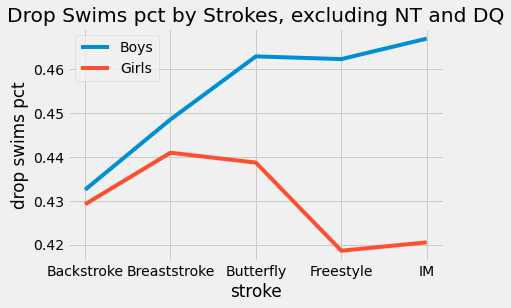

In [51]:
#create data frame for drop for all strokes
filt = ((df_drop_gain_stroke_join["gender"] == "Boys") & (df_drop_gain_stroke_join["gain_drop_same"] == "Drop"))
df_drop_stroke_boys = df_drop_gain_stroke_join[filt]

filt = ((df_drop_gain_stroke_join["gender"] == "Girls") & (df_drop_gain_stroke_join["gain_drop_same"] == "Drop"))
df_drop_stroke_girls = df_drop_gain_stroke_join[filt]


#Drop by Stroke
x1 = df_drop_stroke_boys["stroke"] 
y1 = df_drop_stroke_boys["gain_drop_pct"]

x2 = df_drop_stroke_girls["stroke"] 
y2 = df_drop_stroke_girls["gain_drop_pct"]

plt.plot(x1,y1, label = "Boys")
plt.plot(x2,y2, label = "Girls")


plt.title("Drop Swims pct by Strokes, excluding NT and DQ")
plt.xlabel("stroke")
plt.ylabel("drop swims pct")

plt.grid(True)
plt.style.use("fivethirtyeight")
plt.legend(loc="upper left")

plt.show()



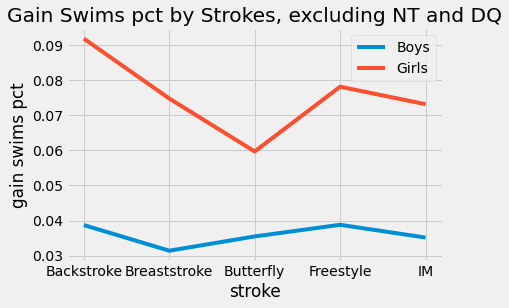

In [50]:
#create data frame for gain for all strokes

filt = ((df_drop_gain_stroke_join["gender"] == "Boys") & (df_drop_gain_stroke_join["gain_drop_same"] == "Gain"))
df_gain_stroke_boys = df_drop_gain_stroke_join[filt]


filt = ((df_drop_gain_stroke_join["gender"] == "Girls") & (df_drop_gain_stroke_join["gain_drop_same"] == "Gain"))
df_gain_stroke_girls = df_drop_gain_stroke_join[filt]

#Gain by Stroke

x1 = df_gain_stroke_boys["stroke"] 
y1 = df_gain_stroke_boys["gain_drop_pct"]

x2 = df_gain_stroke_girls["stroke"] 
y2 = df_gain_stroke_girls["gain_drop_pct"]

plt.plot(x1,y1, label = "Boys")
plt.plot(x2,y2, label = "Girls")


plt.title("Gain Swims pct by Strokes, excluding NT and DQ")
plt.xlabel("stroke")
plt.ylabel("gain swims pct")

plt.grid(True)
plt.style.use("fivethirtyeight")
plt.legend(loc="upper right")

plt.show()

